In [1]:
from defprojetmlfootball import *
import matplotlib.pyplot as plt
from pylab import *
import os
import numpy as np
import pandas as pd

C:\Users\Lucas\Desktop\PIR Foot\defprojetmlfootball.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_to_study["outcome"]=df_to_study["shot"].map(lambda x : x["outcome"]["name"])
C:\Users\Lucas\Desktop\PIR Foot\defprojetmlfootball.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_to_study["technique"]=df_to_study["shot"].map(lambda x : x["technique"]["name"])
C:\Users\Lucas\Desktop\PIR Foot\defprojetmlfootball.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

        period       location     timestamp  outcome    technique  \
144          1   [98.0, 56.0]  00:02:39.760    Off T       Normal   
515          1   [94.0, 26.0]  00:11:31.800    Off T       Normal   
535          1  [102.0, 23.0]  00:12:05.840  Wayward       Normal   
596          1   [99.0, 44.0]  00:14:23.920    Off T       Normal   
855          1  [101.0, 48.0]  00:21:25.160     Goal          Lob   
904          1  [107.0, 38.0]  00:23:50.000    Off T          Lob   
938          1   [86.0, 36.0]  00:24:54.760    Saved       Normal   
1062         1  [100.0, 22.0]  00:29:40.680    Off T       Normal   
1086         1   [95.0, 60.0]  00:31:17.573    Off T       Normal   
1141         1  [105.0, 30.0]  00:32:52.493    Off T  Half Volley   
1159         1  [101.0, 29.0]  00:33:38.120    Off T       Normal   
1247         1  [103.0, 45.0]  00:36:35.360  Blocked       Normal   
1292         1  [108.0, 40.0]  00:40:16.120    Saved       Normal   
1301         1  [104.0, 45.0]  00:

C:\Users\Lucas\Desktop\PIR Foot\defprojetmlfootball.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_to_study["1V1"]=df_to_study["shot"].map(lambda x : x["one_on_one"] if 'one_on_one' in x else False)


# Partie 1 : Analyse Exploratoire des données

In [2]:
df=createdataframe(evenements(matchescoupedumonde()))
df["but"]=df["outcome"]=="Goal"
df.columns

C:\Users\Lucas\Desktop\PIR Foot\defprojetmlfootball.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_to_study["outcome"]=df_to_study["shot"].map(lambda x : x["outcome"]["name"])
C:\Users\Lucas\Desktop\PIR Foot\defprojetmlfootball.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_to_study["technique"]=df_to_study["shot"].map(lambda x : x["technique"]["name"])
C:\Users\Lucas\Desktop\PIR Foot\defprojetmlfootball.py:143: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Index(['period', 'location', 'timestamp', 'outcome', 'technique',
       'environnement', 'stat', '1V1', 'poste', 'joueur', 'situation',
       'cercle5', 'cercle10', 'ratio', 'equipe', 'adversaires', 'angle_de_tir',
       'distance', 'but'],
      dtype='object')

## Répartition des "resultats" des tirs

In [3]:
df["outcome"].value_counts()   

Off T      572
Blocked    459
Saved      341
Goal       183
Wayward    127
Post        24
Name: outcome, dtype: int64

Off T : la trajectoire initiale est hors des cages

Blocked : arrété par la défense 

Saved : Arrété par le goal

Goal : le tir a donné en un but accordé par l'arbitre

Wayward : tir raté, soit pas assez de puissance soit le joueur a manqué le ballon soit complétement non cadré

Post : Le tir a touché un poteau ou la barre transversale

In [4]:
df["outcome"].describe()

count      1706
unique        6
top       Off T
freq        572
Name: outcome, dtype: object

Il y a 1706 tirs pendant la coupe du monde. Ces tirs peuvent prendre 6 modalités (voir ci-dessus). La plus fréquente étant un tir non cadré.

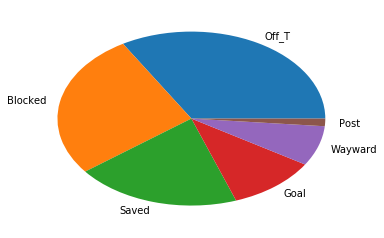

In [5]:
labels="Off_T","Blocked","Saved","Goal","Wayward","Post"
plt.pie(df["outcome"].value_counts(), labels=labels)
plt.show()

Diagramme de la répartition des evenements "tir", la majeur partie est arrêté ou hors cadre ou encore sauvé par le gardien

## Boxplots et histogrammes des variables quantitatives indépendemment du résultat du tir

Nous allons observer les différentes variables au moment d'un tir, sans prendre en compte si il donne un but ou pas, afin de tirer des premières conclusions quant au comportement des tireurs. Le but est ensuite de sélectionner les variables les plus représentatives et utiles pour la prédiction d'un but.

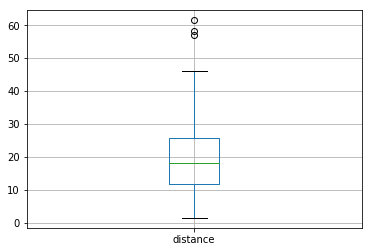

In [6]:
df.boxplot('distance')

La distance médianne est proche de 20m (50% des tirs sont frappés a plus de 20m et 50% a moins) et les valeurs sont comprises entre 1m et 45m si on enlève les outliers. Les tirs sont tentés d'assez pres ce qui est logique.

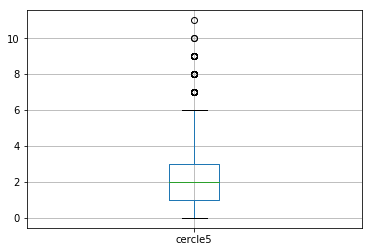

In [7]:
df["cercle5"]=pd.to_numeric(df["cercle5"])
df.boxplot('cercle5')

50% des tirs sont effectués avec plus de 2 joueurs dans un rayon de 5 m autour du porteur du ballon. Les valeurs sont en général assez faibles. Les tireurs ont tendance à tenter leur chance quand ils ont de l'espace.

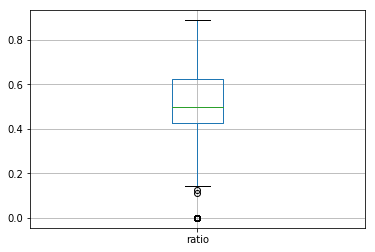

In [8]:
df["ratio"]=pd.to_numeric(df["ratio"])
df["adversaires"]=pd.to_numeric(df["adversaires"])
df["equipe"]=pd.to_numeric(df["equipe"])

df.boxplot('ratio')

Less valeurs prises par la varibale ratio sont en général situées entre 0.4 et 0.6. Le ratio étant calculé avec le rapport de la varibale equipe sur la variable adversaires, on peut dire qu'il y a en general environ deux fois plus de joueurs de léquipe adverse au tireur que de coéquipiers à lui.

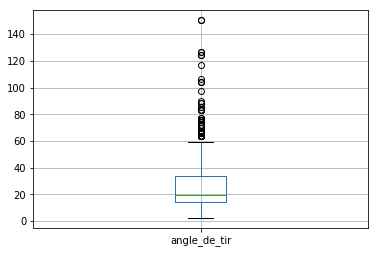

In [9]:
df.boxplot('angle_de_tir')

La médianne des angles de tir se situent à 20 degrés cependant on observe beaucoup d'outliers, en effet meme si la plupart des tirs sont entre 1 et 60°, il n'est pas rare d'avoir des tirs avec des angles plus ouverts (si le tireur est proche et en face par exemple). Ces tirs correspondent surement aux buts.

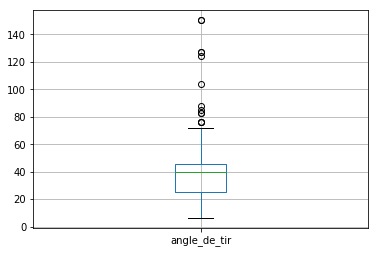

In [10]:
df[df["outcome"]=="Goal"].boxplot('angle_de_tir')

En effet, la médiane des angles de tir lorsqu'il y a but est bien plus élevé, les buts sont donc souvent des outliers.

## Analyse des variables pertinentes en fonction du "résultat" du tir. 

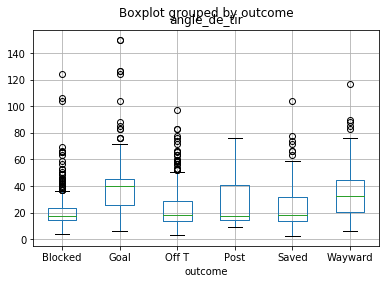

In [11]:
df.boxplot(column="angle_de_tir",by="outcome")

Ce boxplot nous permet de constater que l'angle médian des buts se situe à 40° et que pour les buts les angles sont en genral plus ouverts.

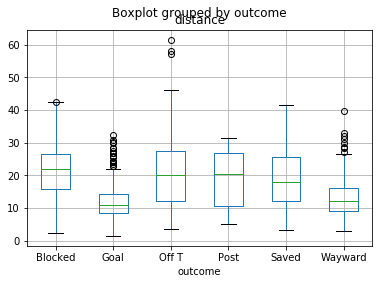

In [12]:
df.boxplot(column="distance",by="outcome")
plt.show()

On peut remarquer que la distance influe sur les buts car plus le tireurs est pres plus il marque et plus il est loin plus ses tirs sont arrêtés ou sauvés

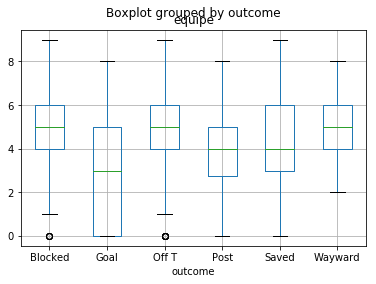

In [13]:
df.boxplot(column="equipe",by='outcome')
plt.show()

D'après ce boxplot il semblerait que moins le tireur à d'equipiers devant lui plus il marque. Cela semble logique car dans une phase offensive l'equipe attaquante est souvent en en sous nombre et plus le joueur et proche du but moins il a de chance d'être derriere un equipier.

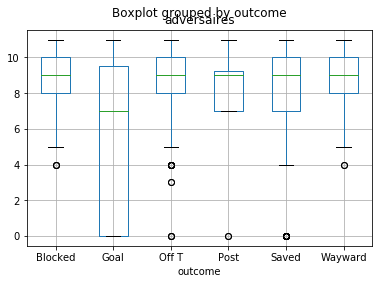

In [14]:
df.boxplot(column="adversaires",by='outcome')
plt.show()

Ce boxplot montre la grande inluence du nombre de defenseurs sur la possibilité ou non de marquer un but, les tirs ratés correspondent pour la plupart à une situation avec beaucoup de défenseurs devant le tireur.
 Cependant la moyenne de défenseurs présent devant le tireur devant un but et aussi élevée, en effet les situation de 1 contre 1 ou de 2 contre 1 sont assez rares et les buts interviennent souvent face à une defense en place et au complet.

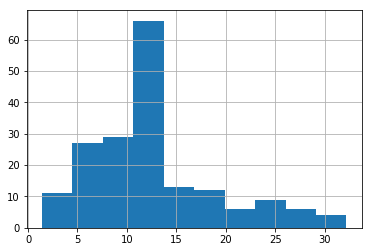

In [15]:
df[df["but"]==1]["distance"].hist()

On peut voir que, logiquement, il y a moins de buts lorsque la distance est très importante. La distance idéale pour marquer semblre être en 10 et 15 mètres. Il n'y a pas énormément de buts extrêmement près car c'est plus compliqué de se retrouver très près du gardien. 

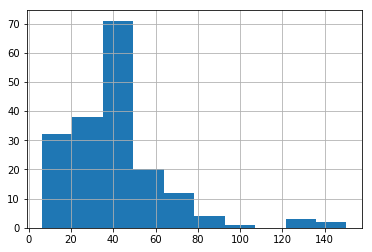

In [16]:
df[df["but"]==1]["angle_de_tir"].hist()

L'angle de tir idéal semble se trouver entre 35 et 50°. Il y a peu de buts au delà, probablement car cela implique d'être extrêmement près du but ce qui est plus compliqué. 

### Distance en fonction de l'angle de tir 
On représente les buts en rouge et les autres tirs en bleu

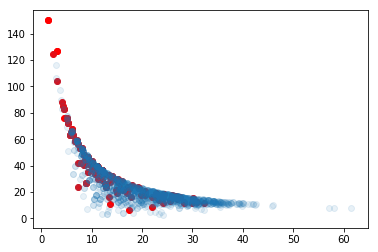

In [17]:
plt.scatter(df[df["but"]==1]["distance"],df[df["but"]==1]["angle_de_tir"],c='r')
plt.scatter(df[df["but"]==0]["distance"],df[df["but"]==0]["angle_de_tir"],alpha=0.1)
plt.show()

On observe que la distance diminue quand l'angle de tir augmente et que les buts sont plus nombreux avec une petite distance et un grand angle de tir

### Nombre de joueurs dans les 5 mètres autour du frappeur en fonction de l'angle de tir  

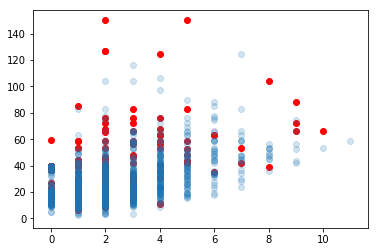

In [18]:
plt.scatter(df[df["but"]==1]["cercle5"],df[df["but"]==1]["angle_de_tir"],c='r')
plt.scatter(df[df["but"]==0]["cercle5"],df[df["but"]==0]["angle_de_tir"],alpha=0.2)
plt.show()

quelque soit le nombre de joueur devant le tireur, plus l'angle de tir augmente plus il y a de chance d'avoir un but. Moins il y a de joueurs, plus il y a de buts également.

### Désormais, représentons les buts sur le terrain : 

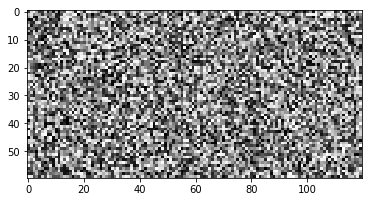

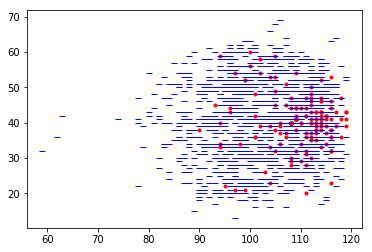

In [20]:
import matplotlib.pyplot as plt
plt.imshow(np.random.rand(60,120), 'gray')
but= [list(map(float,l)) for l in df[df["outcome"]=="Goal"]["location"]]
nonbut= [list(map(float,l)) for l in df[df["outcome"]!="Goal"]["location"]]

fig, ax = plt.subplots(1, 1)
ax.plot([x[0] for x in but],[x[1] for x in but],'.r',[x[0] for x in nonbut],[x[1] for x in nonbut],'_b')

Ici, on affiche les "buts" et les "non but". On voit clairement qu'il y a un plus grand équilibre entre ces deux outcome lorsque l'on frappe de près et face aux cages. Dès que l'on s'exentre ou que l'on tire de plus loin, il y a beaucoup plus de "non but" que de buts. 

## Corrélations entre les différentes variables quantitatives :

In [21]:
df['cercle5']=pd.to_numeric(df['cercle5'])
df['cercle10']=pd.to_numeric(df['cercle10'])
df['ratio']=pd.to_numeric(df['ratio'])
df['adversaires']=pd.to_numeric(df['adversaires'])
df['equipe']=pd.to_numeric(df['equipe'])
corr=df.corr()
corr.style.background_gradient(cmap='coolwarm')



,period,stat,1V1,cercle5,cercle10,ratio,equipe,adversaires,angle_de_tir,distance,but
period,1,0.40426,-0.0296242,-0.101052,-0.150594,-0.281026,-0.224516,-0.343017,0.0982367,-0.111374,0.20223
stat,0.40426,1,0.141438,-0.108531,-0.182709,-0.587629,-0.537322,-0.707806,0.531396,-0.462343,0.535901
1V1,-0.0296242,0.141438,1,-0.0181152,-0.0653416,-0.147496,-0.180483,-0.142856,0.0415417,-0.161265,0.130934
cercle5,-0.101052,-0.108531,-0.0181152,1,0.782385,0.127831,0.160866,0.27893,0.484314,-0.48444,-0.0201861
cercle10,-0.150594,-0.182709,-0.0653416,0.782385,1,0.25588,0.300787,0.421307,0.468072,-0.471555,-0.0596069
ratio,-0.281026,-0.587629,-0.147496,0.127831,0.25588,1,0.910652,0.686538,-0.159461,0.316467,-0.30343
equipe,-0.224516,-0.537322,-0.180483,0.160866,0.300787,0.910652,1,0.827236,-0.13743,0.333723,-0.267035
adversaires,-0.343017,-0.707806,-0.142856,0.27893,0.421307,0.686538,0.827236,1,-0.12155,0.26205,-0.357936
angle_de_tir,0.0982367,0.531396,0.0415417,0.484314,0.468072,-0.159461,-0.13743,-0.12155,1,-0.751723,0.309302
distance,-0.111374,-0.462343,-0.161265,-0.48444,-0.471555,0.316467,0.333723,0.26205,-0.751723,1,-0.259057


La plupart des corrélations paraissent logiques et intuitives. Tout d'abord, "stat" et "but" sont très corrélés positivement, ce qui est rassurant car "stat" calcule la probabilité qu'il y ai but. "Angle_de_tir" est positivement corrélé avec "stat" ce qui est logique également, tout comme "period" et "stat" : les équipes fatiguent donc il y a plus de buts en 2ème mi-temps. 

A l'inverse, "distance" est très négativement corrélée à "stat" et à "but" (logique aussi, plus un joueur est loin moins il marque). "Adversaires" et "equipe" sont aussi très négativement corrélées avec "stat", tout comme, dans une moindre mesure, cercle5 et cercle10 : en effet, plus il y a de joueurs devant le frappeur, moins il a de chance de marquer. 

Notre seul surprise se trouve dans le fait que "1vs1" et "stat" ne soit que peu positivement corrélés



# Partie 2 : Analyse en Composantes Principales (ACP)

In [ ]:
from sklearn.decomposition import PCA

On importe la méthode PCA de scikit learn

In [ ]:
pca = PCA(n_components=4)
pca

On fixe le nombre de composantes principales. 

In [ ]:
dfapprentissage=df[['cercle5','equipe','adversaires','angle_de_tir','distance','but']][:len(df)-len(df.tail())]
shape(dfapprentissage)
dfapprentissage[dfapprentissage.columns[:-1]]

La on ne prend pour l'acp que les variables quantitatives. La variable but est la variable a exprimé en fonction des composantes principales qui seront determinées.

In [ ]:
dfapprentissage[dfapprentissage.columns[:-1]].boxplot()
plt.show()

On s'aperçoit en regardant la répartition des variables quantitatives que l'on va utiliser pour l'acp que les dispersion sont très différentes. Il est donc utile de centrer et réduire nos données.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
apprentissage = scaler.fit_transform(dfapprentissage[dfapprentissage.columns[:-1]])

standradscaler sert à réduire et centrer les données, pour éviter que une variable avec une trop grosse variance prenne plus d'importance que les autres dans la création des composantes principales.

In [ ]:
plt.boxplot(apprentissage)
plt.show()

On voit que les variables centrées réduites sont dispersées de manière plus homogènes que les variables d'origine avec la variable angle_de_tir qui avait une variance très élevée.

In [ ]:
C = pca.fit_transform(apprentissage)

On peut faire le fit et le transform séparément. Le fit permet d'apprendre, et le transform change les individus de base. Leurs coordonnées sont maintenant exprimées dans la base des vecteurs propres de l'acp. 

In [ ]:
plt.bar(np.arange(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.title("Variance expliquée");

Ici, on observe l'inertie de chaque composante principale sur la représentation des variables d'origine. Les deux premières composantes principales sont importantes dans notre représentation.

In [ ]:
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dfapprentissage.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)

 
plt.show()

Ici on affiche les variables d'origine sur les deux axes principaux. On observe que la variable angle_de_tir et la variable distance sont négativement corrélées. En effet, plus un joueur est à une distance faible du but, plus son angle de tir est élevé. On voit aussi que les variables adversiare et équipe ont les mêmes composantes sur les axes principaux, elles sont très corrélées. C'est logique car plus il y a de joueur dans notre côté du terrain, plus on a besoin de défenseurs. 

In [ ]:
X_reduced = pca.transform(apprentissage)
X_reduced_goal = X_reduced[np.array(dfapprentissage['but']),:]
X_reduced_not_goal = X_reduced[~ np.array(dfapprentissage['but']),:]
plt.figure(figsize=(18,6))
plt.scatter(X_reduced_goal[:, 0], X_reduced_goal[:, 1], c='red', alpha=1)
plt.scatter(X_reduced_not_goal[:, 0], X_reduced_not_goal[:, 1], c='blue', alpha=0.1)

coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
for i, j, nom in zip(coord1,coord2, dfapprentissage.columns):
    plt.text(i*5, j*5, nom, fontsize=15)
    plt.arrow(0,0,i*5,j*5,color='black')

plt.show()

On observe en bleu les tirs ratés et en rouge les buts. Deux tendances se dégagent bien de ce shéma. Les  buts sont plus décalés en général vers la droite. Il y a donc des schémas de buts qui reviennent souvent : Lorsque la distance est faible et l'angle de tir est important. Pour conclure, nous pouvons dire que l'acp confirme nos hypothèses faites lors de la phase exploratoire. 

# Partie 3 : Regression logistique

## A) Régression avec les variables de l'ACP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
modele_regression_logistique = linear_model. LogisticRegression ()
X_train, X_test, y_train, y_test = train_test_split( dfapprentissage[dfapprentissage.columns[:-1]], dfapprentissage['but'], test_size=0.3)
fitter= modele_regression_logistique.fit (X_train,y_train)

On importe tout d'abord la méthode train_test_split qui permet de transformer un échantillon de données en deux parties: apprentissage et tests.Ensuite on entraîne la régression logistique sur l'échatillon d'apprentissage. On s'entraîne sur 70% des individus.On tente de prédire sur 30% des données restantes.

In [ ]:
1-fitter.score(X_test, y_test)

L'erreur est estimée à moins de 10%.

In [ ]:
prediction=fitter.predict (X_test)

In [ ]:
score=fitter.score(X_test,y_test)
score

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

In [ ]:
from IPython.display import Image
Image("f1score.png")

Le f1 score est calculé par 2.(precision.recall) / (precision + recall)

In [ ]:
from sklearn.metrics import mean_squared_error
y_true = y_test
y_pred = fitter.predict_proba(X_test)[:,1]
mean_squared_error(y_true, y_pred)

on calcule l'erreur moyenne entre notre stat calculée par la régression logistique et le résultat qui est donc 0 ou 1. 

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, prediction)
conf

In [ ]:
cf = pd.DataFrame(conf, columns=['prédit ' + _ for _ in [ "false","true"]])
cf.index = ['vrai ' + _ for _ in ["false","true"]]
cf

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probas = fitter.predict_proba(X_test)
logit_roc_auc = roc_auc_score(y_test, prediction)
fpr, tpr, thresholds = roc_curve(y_test, probas[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

On a ici la courbe ROC, on peut voir que l'on fait déjà bien mieux que le hasard (la droite en rouge) ce qui est une bonne chose.

## B) Régression avec ajout de variables qualitatives

In [ ]:
dfapprentissage2=pd.get_dummies(df[['cercle5','equipe','adversaires','angle_de_tir','distance','technique','poste','situation','but']])


In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split( dfapprentissage2[dfapprentissage2.columns.drop('but')], dfapprentissage2['but'], test_size=0.3)
fitter2=linear_model. LogisticRegression ().fit (X_train2,y_train2)

In [ ]:
prediction2=fitter2.predict(X_test2)
fitter2.score(X_test2,y_test2)

Le score est sensiblement le même que lorsque l'on utilise les variables de l'ACP. 

## C) Comparaison avec les résultats de Statsbomb

In [ ]:
df["but_statbomb"]=[1 if k>0.5 else 0 for k in df["stat"]]
df

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
probas2 = fitter2.predict_proba(X_test2)
logit_roc_auc = roc_auc_score(y_test2, prediction2)
fpr, tpr, thresholds = roc_curve(y_test2, probas2[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

On peut voir que l'on arrive à un niveau de prédiction des buts sensiblement équivalent à celui de Statsbomb. 

## D) Régression avec suréchantillonnage 

On peut s'interroger sur la qualité de nos résultats précédents. Les buts étant très rares par rapport au nombre de tirs, même en prédisant 100% de "non buts", on obtiendrait un score extrêmement bon. Pour tester la robustesse de notre méthode, nous allons donc artificiellement ajouter des buts dans le dataframe : on appelle cela le suréchantillonnage. Normalement, le score de la prédiction devrait être moins précis, mais ce serait une bonne chose de toujours faire sensiblement mieux que le hasard.  

In [ ]:


####SURECHANTILLONNAGE

dfbut=dfapprentissage[dfapprentissage['but']==1]
surechantillon=pd.concat([dfapprentissage, dfbut])
surechantillon=pd.concat([surechantillon, dfbut])
surechantillon=pd.concat([surechantillon, dfbut])   #On multiplie le nombre de buts par 4 



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train3, X_test3, y_train3, y_test3 = train_test_split(surechantillon[surechantillon.columns[:-1]], surechantillon['but'], test_size=0.3)
fitter3 = linear_model. LogisticRegression ()

fitter3.fit(X_train3,y_train3)
score=fitter3.fit(X_train3,y_train3).score(X_test3,y_test3)

In [ ]:
prediction3 = fitter3.predict(X_test3) 
probas3=fitter3.predict_proba(X_test3)[:,1]
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test3, prediction3)
fpr, tpr, thresholds = roc_curve(y_test3, probas3)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Ajouter le score. 
